# Meu portfólio

<b>Aqui estará concentrada toda analise do meu portfólio pessoal.</b>

## Taxa de retorno

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickets = ['BIDI4.SA','MGLU3.SA','ALPA4.SA']

meu_portfolio = pd.DataFrame()

for t in tickets:
    meu_portfolio[t] = wb.DataReader(t, data_source='yahoo', start='2019-1-3')['Adj Close']

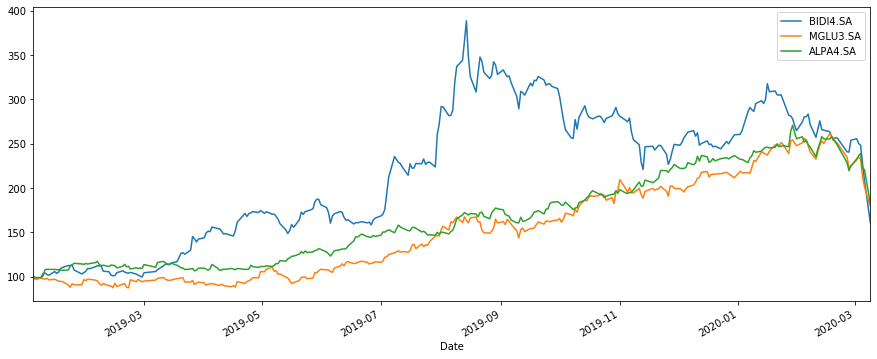

In [3]:
(meu_portfolio / meu_portfolio.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

### Versus Bovespa

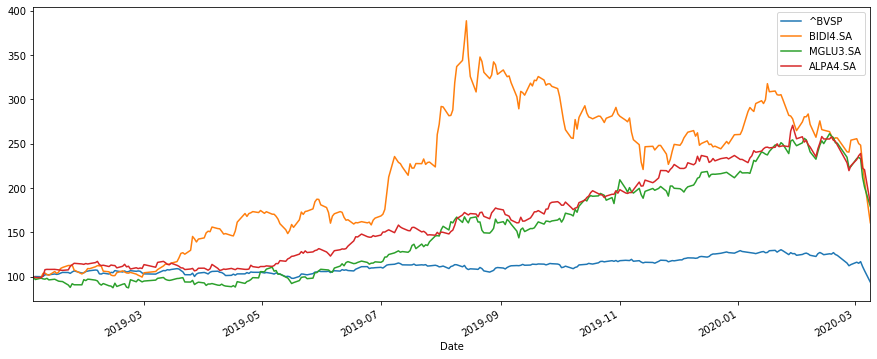

In [4]:
tickets_indice = ['^BVSP', 'BIDI4.SA','MGLU3.SA','ALPA4.SA']

data_2 = pd.DataFrame()

for t in tickets_indice:
    data_2[t] = wb.DataReader(t, data_source='yahoo', start='2019-1-3')['Adj Close']
(data_2 / data_2.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

### Retorno anual por ativo

In [5]:
ind_returns = (meu_portfolio / meu_portfolio.shift(1)) - 1

annual_returns = ind_returns.mean() * 250

annual_returns

BIDI4.SA    0.583385
MGLU3.SA    0.594466
ALPA4.SA    0.580150
dtype: float64

### Retorno anual do portfolio

In [6]:
weights = np.array([0.27,0.36,0.35])

'{}% ao ano'.format(round(np.dot(annual_returns, weights),5) * 100)

'57.457% ao ano'

## Taxa de risco

### Volatilidade (o quanto esse ativo muda)

 - std() é o desvio padrão, que vem com a raiz da variância

In [7]:
meu_portfolio[tickets].std() * 250 ** 0.5

BIDI4.SA     71.958978
MGLU3.SA    192.348624
ALPA4.SA    110.367525
dtype: float64

## Covariancia e Correlação

### Covariancia diaria

In [11]:
ind_returns.cov()

,BIDI4.SA,MGLU3.SA,ALPA4.SA
BIDI4.SA,0.001388,0.000368,0.000339
MGLU3.SA,0.000368,0.000747,0.000281
ALPA4.SA,0.000339,0.000281,0.000490


### Covariância anual

In [9]:
ind_returns.cov() * 250

,BIDI4.SA,MGLU3.SA,ALPA4.SA
BIDI4.SA,0.347045,0.091979,0.084839
MGLU3.SA,0.091979,0.186638,0.070178
ALPA4.SA,0.084839,0.070178,0.122391


### Correlação

In [10]:
ind_returns.corr()

,BIDI4.SA,MGLU3.SA,ALPA4.SA
BIDI4.SA,1.000000,0.361406,0.411651
MGLU3.SA,0.361406,1.000000,0.464327
ALPA4.SA,0.411651,0.464327,1.000000
